In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd

/content


In [36]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('seaborn-white')
from keras import Model
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, SpatialDropout2D, Flatten, Reshape, Input
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam, RMSprop
from keras.utils import to_categorical
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [6]:
!wget --no-check-certificate \
   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O \
   /content/cats_and_dogs_filtered.zip


--2022-11-14 00:34:13--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M  21.0MB/s    in 3.8s    

2022-11-14 00:34:17 (17.3 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [7]:
!ls

cats_and_dogs_filtered.zip  drive  sample_data


In [8]:
local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content')
zip_ref.close()

base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)


In [9]:
!ls

cats_and_dogs_filtered	cats_and_dogs_filtered.zip  drive  sample_data


In [12]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(    
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [15]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['acc'])

In [16]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, # 총학습데이터 / 배치 사이즈
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
100/100 - 27s - loss: 0.6914 - acc: 0.5060 - val_loss: 0.6806 - val_acc: 0.5880 - 27s/epoch - 273ms/step
Epoch 2/30
100/100 - 17s - loss: 0.6815 - acc: 0.5590 - val_loss: 0.6730 - val_acc: 0.5650 - 17s/epoch - 169ms/step
Epoch 3/30
100/100 - 17s - loss: 0.6737 - acc: 0.5960 - val_loss: 0.6520 - val_acc: 0.6240 - 17s/epoch - 167ms/step
Epoch 4/30
100/100 - 17s - loss: 0.6630 - acc: 0.5930 - val_loss: 0.6421 - val_acc: 0.6160 - 17s/epoch - 167ms/step
Epoch 5/30
100/100 - 17s - loss: 0.6317 - acc: 0.6460 - val_loss: 0.5789 - val_acc: 0.6870 - 17s/epoch - 167ms/step
Epoch 6/30
100/100 - 17s - loss: 0.6230 - acc: 0.6535 - val_loss: 0.5716 - val_acc: 0.7020 - 17s/epoch - 167ms/step
Epoch 7/30
100/100 - 17s - loss: 0.6073 - acc: 0.6685 - val_loss: 0.6379 - val_acc: 0.6160 - 17s/epoch - 168ms/step
Epoch 8/30
100/100 - 17s - loss: 0.5909 - acc: 0.6870 - val_loss: 0.5720 - val_acc: 0.6920 - 17s/epoch - 173ms/step
Epoch 9/30
100/100 - 17s - loss: 0.5867 - acc: 0.6905 - val_loss: 0.5550

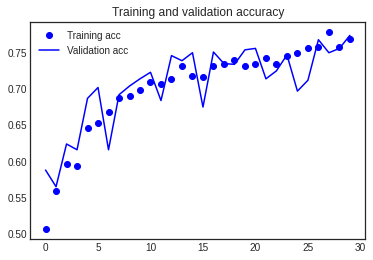

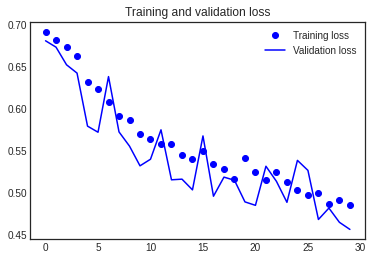

In [29]:
# 시각화
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo', label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
model.save('cats_and_dogs_model.h5')

### 전이학습

In [17]:
from keras.applications import VGG16

In [18]:
conv_base = VGG16(weights='imagenet',   # imagenet으로 학습한 가중치
                  include_top=False,
                  input_shape=(150,150,3))                  


58889256/58889256 [==============================] - 3s 0us/step


In [20]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [21]:
def build_model_with_pretained(conv_base):
  model = Sequential()
  model.add(conv_base)
  model.add(Flatten())
  model.add(Dense(256,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=1e-4),
                metrics=['acc'])
  
  return model


In [22]:
model = build_model_with_pretained(conv_base)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=1e-4),
                metrics=['acc'])

In [24]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(    
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
history2 = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


100/100 - 19s - loss: 0.6863 - acc: 0.5625 - val_loss: 0.6258 - val_acc: 0.6630 - 19s/epoch - 187ms/step
Epoch 2/30
100/100 - 17s - loss: 0.6363 - acc: 0.6290 - val_loss: 0.5266 - val_acc: 0.7780 - 17s/epoch - 168ms/step
Epoch 3/30
100/100 - 17s - loss: 0.5628 - acc: 0.7075 - val_loss: 0.3958 - val_acc: 0.8390 - 17s/epoch - 171ms/step
Epoch 4/30
100/100 - 17s - loss: 0.4170 - acc: 0.8035 - val_loss: 0.3189 - val_acc: 0.8660 - 17s/epoch - 168ms/step
Epoch 5/30
100/100 - 17s - loss: 0.3487 - acc: 0.8455 - val_loss: 0.2027 - val_acc: 0.9250 - 17s/epoch - 169ms/step
Epoch 6/30
100/100 - 17s - loss: 0.2721 - acc: 0.8870 - val_loss: 0.1757 - val_acc: 0.9360 - 17s/epoch - 169ms/step
Epoch 7/30
100/100 - 17s - loss: 0.2540 - acc: 0.8915 - val_loss: 0.1629 - val_acc: 0.9450 - 17s/epoch - 169ms/step
Epoch 8/30
100/100 - 17s - loss: 0.2212 - acc: 0.9130 - val_loss: 0.1706 - val_acc: 0.9280 - 17s/epoch - 168ms/step
Epoch 9/30
100/100 - 17s - loss: 0.1672 - acc: 0.9315 - val_loss: 0.1398 - val_acc:

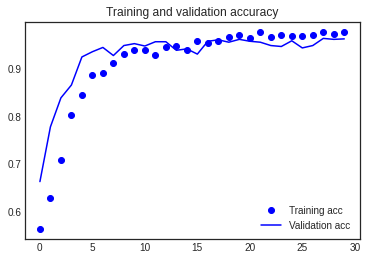

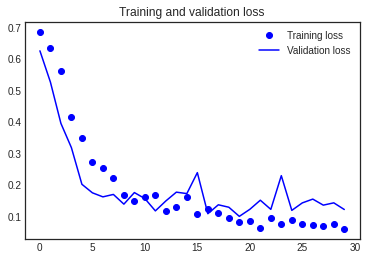

In [28]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo', label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
model.save('cats_and_dogs_pretained_model.h5')

### 과제_1114_1
모델 성능을 개선하기 위하여 다양한 사전학습 모델을 이용한 전이학습을 수행 후 가정 좋은 모델을 설명하세요.

In [31]:
import keras

base_model = keras.applications.Xception(
    weights = 'imagenet',
    input_shape=(150,150,3),
    include_top=False)

83683744/83683744 [==============================] - 5s 0us/step


In [32]:
base_model.trainable=False

In [34]:
inputs = keras.Input(shape=(150,150,3))
x = base_model(inputs,training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs,outputs)

In [37]:
model.compile(optimizer=RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
history3 = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


100/100 - 21s - loss: 5.5983 - accuracy: 0.4905 - val_loss: 5.1410 - val_accuracy: 0.5280 - 21s/epoch - 208ms/step
Epoch 2/30
100/100 - 17s - loss: 4.8524 - accuracy: 0.5085 - val_loss: 4.6561 - val_accuracy: 0.5580 - 17s/epoch - 168ms/step
Epoch 3/30
100/100 - 17s - loss: 4.2766 - accuracy: 0.5205 - val_loss: 4.0735 - val_accuracy: 0.5550 - 17s/epoch - 168ms/step
Epoch 4/30
100/100 - 17s - loss: 3.4996 - accuracy: 0.5595 - val_loss: 3.5205 - val_accuracy: 0.5780 - 17s/epoch - 167ms/step
Epoch 5/30
100/100 - 17s - loss: 3.1972 - accuracy: 0.5940 - val_loss: 3.0291 - val_accuracy: 0.6090 - 17s/epoch - 169ms/step
Epoch 6/30
100/100 - 17s - loss: 2.7457 - accuracy: 0.5990 - val_loss: 2.5792 - val_accuracy: 0.6490 - 17s/epoch - 167ms/step
Epoch 7/30
100/100 - 17s - loss: 2.5686 - accuracy: 0.6425 - val_loss: 2.0367 - val_accuracy: 0.6890 - 17s/epoch - 168ms/step
Epoch 8/30
100/100 - 17s - loss: 2.0059 - accuracy: 0.6825 - val_loss: 1.7873 - val_accuracy: 0.7180 - 17s/epoch - 167ms/step
Epo

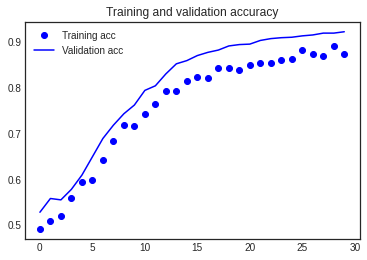

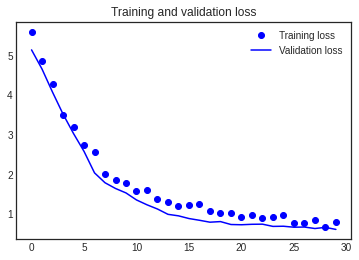

In [40]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo', label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
model.save('cats_and_dogs_pretained_ft_model.h5')